# Proyecto final de la Primera Evaluación
Este proyecto tiene como finalidad el entrenamiento y configuración de un modelo de Regresión Lineal simple y múltiple.

In [4]:
import pandas as pd
import numpy as np

from seaborn import boxplot, JointGrid, scatterplot, histplot

In [5]:
path = '../data/datains_e.xlsx'
df = pd.read_excel(path)

## Estudio estructural de la base de datos 
Vamos a utilizar algunas de los métodos y propiedades de la clase `DataFrame` de `pandas` para estudiar la estructura de los datos.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     200 non-null    int64  
 1   age       196 non-null    float64
 2   sex       198 non-null    object 
 3   bmi       196 non-null    float64
 4   children  199 non-null    float64
 5   smoker    197 non-null    object 
 6   region    200 non-null    object 
 7   charges   200 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 12.6+ KB


### Análisis
Como se puede observar, contamos con **8 columnas** en una tabla con un total de **200 registros**.

**5** de las 8 columnas (`age`, `sex`, `bmi`, `children`, `smoker`) cuentan **valores nulos** que deberemos tratar más adelante.

Como indica `dtypes` en el informe, contamos con **5 variables númericas** (*4 de ellas son flotantes y 1 es entera*) y **3 variables categóricas** que tendremos que codificar posteriormente para estudiar su correlación con el **target**. 

En este caso, nuestra **variable objetivo o target** es el importe del seguro (`charge`) que depende del resto de variables; las **features o variables objetivo**.

Ahora, vamos a observar también algunas **medidas estadísticas** que nos resultarán útiles a la hora de **escalar los valores**. 

In [7]:
# Tabla con medidas estadísticas básicas para cada variable numérica
df.describe()

,index,age,bmi,children,charges
count,200.000000,196.000000,196.000000,199.000000,200.000000
mean,710.965000,39.948980,32.417857,1.075377,13790.512035
std,386.430845,13.752294,22.629577,1.118868,12195.955051
min,5.000000,18.000000,16.815000,0.000000,1121.873900
25%,374.750000,27.750000,26.407500,0.000000,5451.159125
50%,750.500000,40.000000,30.800000,1.000000,9526.937700
75%,1048.250000,51.000000,34.900000,2.000000,17610.229900
max,1335.000000,64.000000,334.700000,5.000000,52590.829390


## EDA (Análisis Exploratorio de Datos) 
Una vez hemos estudiado la estrucutra básica de los datos, debemos realizar el EDA. Este proceso va a consistir en los siguientes pasos:
- Análisis descriptivo
- Codificación de variables categóricas
- Identificación y tratamiento de valores nulos -> **valores NaN**
- Identificación y tratamiento de valores atípicos -> **outliers**
- Estudio de correlación entre las variables de la base de datos.

### Análisis descriptivo
En este proceso, vamos a analizar la distribución de los datos; su **dispersión con respecto al target o variable objetivo**, ya que hemos establecido anteriormente cuál es; y la presencia de **outliers o valores atípicos** con un **diagrama de caja y bigote**. Esto implica que a la hora de tratar los outliers, ya habremos cubierto la parte de identificación, por lo que adelantamos trabajo.

Con el objetivo de aprovechar espacio dentro del cuaderno, voy a utilizar la clase `JointGrid` de la librería `seaborn` para representar la distribución y dispersión de los datos con respecto a la variable objetivo.
Para evitar guardar referencias inncesarias dentro de la memoria, voy a utilizar instancias anónima de la calase.

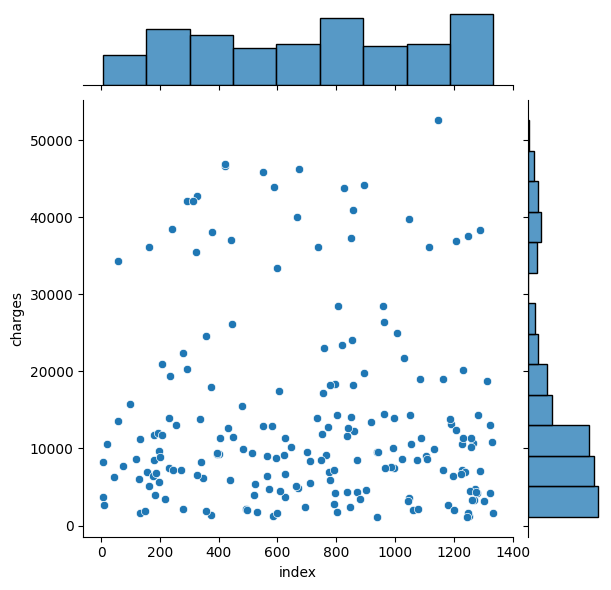

In [20]:
JointGrid(data=df, x='index', y='charges') \
    .plot(scatterplot, histplot)